In [1]:
# Elle Nguyen - CIS 3715 - Section 02
# Lab 4 - Logistic Regression

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import matplotlib.pyplot as plt
import random
random.seed(123)

df = pd.read_csv('~/Downloads/heart.csv')

In [2]:
# Task 2.1 - Preprocess the raw data

# Check whether there are missing values
print(df.isnull().sum())
print("\nThere are no missing values in this dataset.\n")

# Check whether there are categorical features
print(df.info())
print("\nThere are no categorical features in this dataset.\n")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64

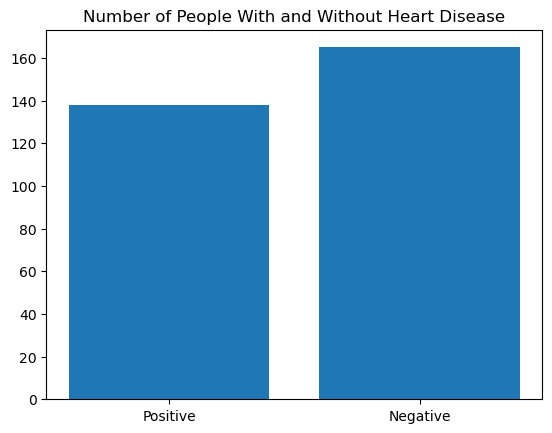

The dataset is balanced


In [3]:
# Check whether this dataset is balanced or not
# (use the bar plot to visualize the number of positive and negative samples)

# Count the number of positive and negative samples
counts = df['target'].value_counts()

# Plot the counts using a bar plot
plt.bar(counts.index, counts.values)
plt.title('Number of People With and Without Heart Disease')
plt.xticks(counts.index, ['Negative', 'Positive'])
plt.show()

print("The dataset is balanced")

In [4]:
# Task 2.2 - Split the data into 2 subsets and normalize the features of samples
heart_data = df.drop('target', axis=1).values
heart_disease = df['target'].values
X_train_val, X_test, y_train_val, y_test = train_test_split(heart_data, heart_disease, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 260, test: 43


In [5]:
# Task 2.3 - Train the logistic regression model and select the hyperparameter with cross-validation

# Use the 10-fold cross-validation to select the hyperparameter λ
folds = 10

# get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

# shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

# split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

# Search λ
regularization_coefficient = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
        
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg

print("The best hyperparameter is {}".format(best_reg))

[[ 63 221  54 104 121  98 149 205  31  29 190 243  25 180 142  38 173  94
  148 186 159  24 204  64  75 201]
 [ 12 160 109  61 242 102 129  72 233  56 217  14 219 239   6  57  70 158
   35 216 140 181 106  92 117 112]
 [ 50 127  19 236 153 164 177 105  76 213  28 178 138 200 226  84 119  77
  176 151  83 172 154  16  89  82]
 [ 37 210 197 115 135  66   7 206 256  30 183  47 167 188  91 125 174  20
  249 212 108 257  53  42  71 169]
 [162  60  33 235 157  51  81  88 192 207 161  68 194 225 222  55  10 147
  132 145 184 237  79 254 234 182]
 [191  69 156  65 253  49 166 241   2 220 118 227 113 189  39  45 215 139
   59 126  73  15 128 255 103  58]
 [ 90 195  93 252 150  48   4 251 211  99 116  18 100 141 240 238  43 209
  168 185  21  46 193   8 130  95]
 [107 171 203 124 228 244 199 248 175 232 131 165 101   3 229 144 134 163
  155  52 123 133 245  78 196 250]
 [120  67 122 146 110  74   5 202  32  36 170  23  11 259 114 187  80   1
   17  96 152 224  22 198 111 231]
 [  0  41  62 179 2

In [6]:
# Task 2.4 - Evaluate the learned model

# Report the prediction accuracy, recall, precision, and F1 score.
# retrain the model
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(acc, recall, precision, f1))

accuracy: 0.791, recall: 0.905, precision: 0.731, f1: 0.809


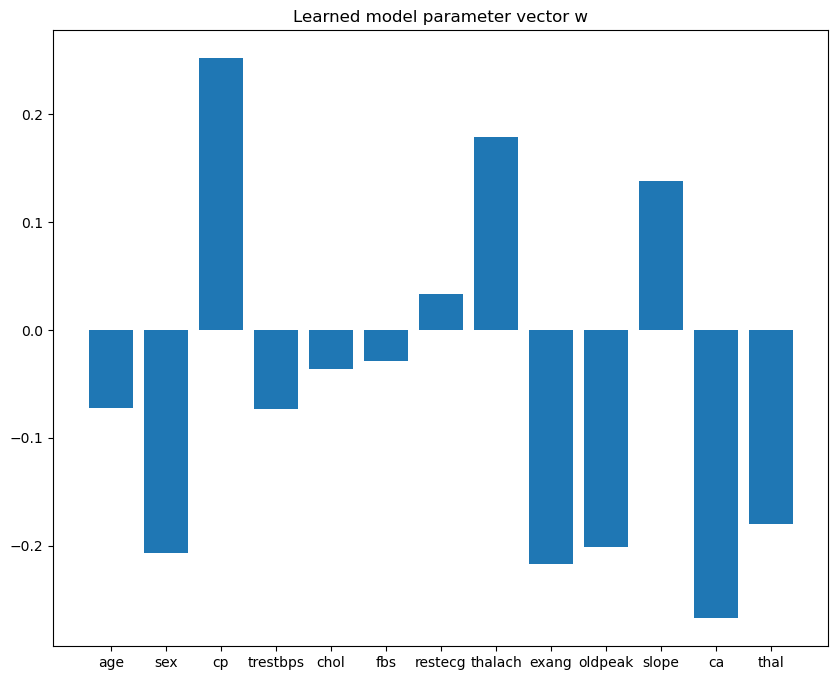

In [7]:
# Use the bar plot to visulaize the elements of the learned model parameter vector w
# Some elements have larger absolute values, while the others do not. Try to explain this phenomenon.
fig = plt.figure(figsize=(10,8))
plt.title("Learned model parameter vector w")
plt.bar(df.columns[:-1], clf.coef_[0])
plt.show()

-> Explanation: 
- The magnitude of each weight corresponds to the strength of the relationship between that feature and the target variable. Therefore, large absolute values indicate that those features have a strong influence on the predicted outcome. For example, cp (chest pain type) and ca (number of major vessels) have the highest absolute values. It's easy to predict which patient is likely to have a heart disease based on these data because such learned vectors hugely impact our prediction.
- On the other hand, small absolute values indicate that the corresponding features have little to no effect on the outcome such as chol (serum cholestoral in mg/dl) and fbs (fasting blood sugar > 120 mg/dl); these features do not relate to heart disease, thus hard to make predictions.